# Map of Convenience Store in Japan

*@rikipafe, August 20 2015*

### Install pre-requisite requirements.
[http://matplotlib.org/basemap/users/installing.html]

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## Loading The OpenStreetMap Data with Pandas

* [Open Street Map](http://openstreetmap.org).
* [OSM-x-tractor](http://osm-x-tractor.org/Data.aspx)

In [48]:
import pandas as pd
data = pd.read_csv('POIAsia.csv', nrows=5)
data.columns

Index([u'﻿"osmid"', u'name', u'amenity', u'emergency', u'geological', u'historic', u'leisure', u'man_made', u'office', u'shop', u'sport', u'tourism', u'craft', u'Longitude', u'Latitude'], dtype='object')

In [49]:
columns = ["name", "Longitude", "Latitude"]
data = pd.read_csv('POIAsia.csv', usecols=columns)
data.head()

,name,Longitude,Latitude
0,Sagada Municipal Hall,120.900729,17.084194
1,East Point,120.620201,14.385618
2,Intramuros,120.975330,14.590586
3,NaN,44.397175,33.325580
4,NaN,44.395485,33.325715


In [50]:
with_name = data[data.name.notnull()]

In [51]:
with_name.name.value_counts().head(20)

セブン-イレブン      3468
Сбербанк      3383
7-Eleven      2960
К-150         2506
ファミリーマート      2486
ローソン          2442
Продукты      2079
Магнит        1904
К-200         1620
К-100         1337
Аптека        1282
Т-100         1124
Лукойл        1110
ENEOS         1020
マクドナルド         926
Шиномонтаж     920
McDonald's     830
KFC            812
К-300          773
サンクス           747
dtype: int64

In [52]:
sevenEleven = with_name[with_name.name.str.contains('セブン-イレブン')|
                        with_name.name.str.contains('セブンイレブン')|
                        with_name.name.str.contains('7-11')|
                        with_name.name.str.contains('7-[Ee]leven')|
                        with_name.name.str.contains('[Ss]even [Ee]leven')]
familyMart = with_name[with_name.name.str.contains('ファミリーマート')|
                      with_name.name.str.contains('[Ff]amily [Mm]art')]
lawson = with_name[with_name.name.str.contains('ローソン')|
                      with_name.name.str.contains('[Ll]awson')]

In [53]:
print sevenEleven.name.count(), familyMart.name.count(), lawson.name.count()

8820 3252 3628


In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def draw_JPN():
    """initialize a basemap centered on the continental JPN"""
    plt.figure(figsize=(14, 10))
    return Basemap(projection='lcc', resolution='l',
                   llcrnrlon=120, urcrnrlon=160,
                   llcrnrlat=22, urcrnrlat=49,
                   lat_1=33, lat_2=45, lon_0=130,
                   area_thresh=10000)

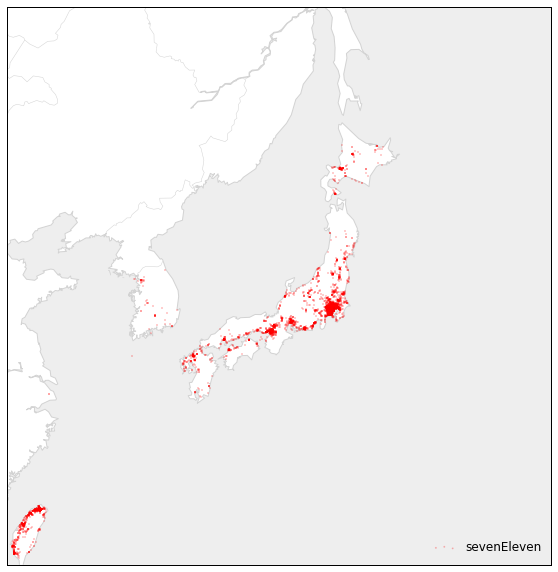

In [55]:
m = draw_JPN()
    
# Draw map background
m.fillcontinents(color='white', lake_color='#eeeeee')
m.drawstates(color='lightgray')
m.drawcoastlines(color='lightgray')
m.drawcountries(color='lightgray')
m.drawmapboundary(fill_color='#eeeeee')

# Plot the values
style = dict(s=1, marker='o', alpha=0.2, zorder=2)
m.scatter(sevenEleven.Longitude.values,
          sevenEleven.Latitude.values, latlon=True,
          label="sevenEleven", color='red', **style)
#m.scatter(familyMart.Longitude.values,
#          familyMart.Latitude.values, latlon=True,
#          label="familyMart", color='green', **style)
#m.scatter(lawson.Longitude.values,
#          lawson.Latitude.values, latlon=True,
#          label="lawson", color='blue', **style)
plt.legend(loc='lower right', frameon=False);

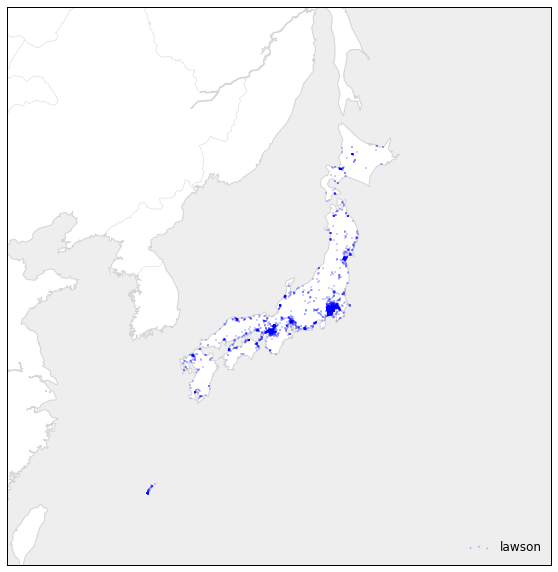

In [56]:
m = draw_JPN()
    
# Draw map background
m.fillcontinents(color='white', lake_color='#eeeeee')
m.drawstates(color='lightgray')
m.drawcoastlines(color='lightgray')
m.drawcountries(color='lightgray')
m.drawmapboundary(fill_color='#eeeeee')

# Plot the values
style = dict(s=1, marker='o', alpha=0.2, zorder=2)
#m.scatter(sevenEleven.Longitude.values,
#          sevenEleven.Latitude.values, latlon=True,
#          label="sevenEleven", color='red', **style)
#m.scatter(familyMart.Longitude.values,
#          familyMart.Latitude.values, latlon=True,
#          label="familyMart", color='green', **style)
m.scatter(lawson.Longitude.values,
          lawson.Latitude.values, latlon=True,
          label="lawson", color='blue', **style)
plt.legend(loc='lower right', frameon=False);

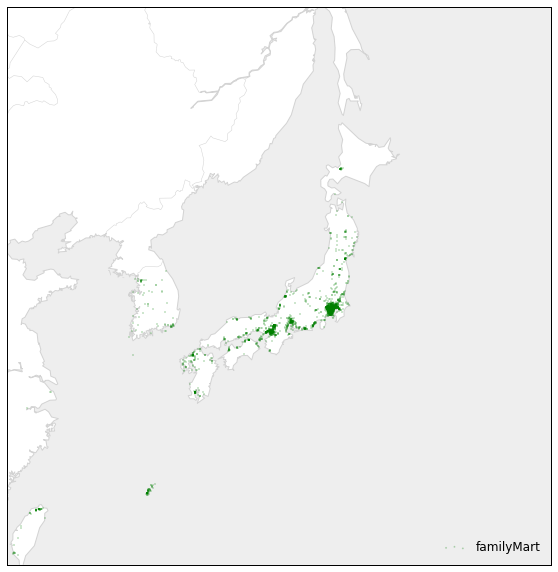

In [57]:
m = draw_JPN()
    
# Draw map background
m.fillcontinents(color='white', lake_color='#eeeeee')
m.drawstates(color='lightgray')
m.drawcoastlines(color='lightgray')
m.drawcountries(color='lightgray')
m.drawmapboundary(fill_color='#eeeeee')

# Plot the values
style = dict(s=1, marker='o', alpha=0.2, zorder=2)
#m.scatter(sevenEleven.Longitude.values,
#          sevenEleven.Latitude.values, latlon=True,
#          label="sevenEleven", color='red', **style)
m.scatter(familyMart.Longitude.values,
          familyMart.Latitude.values, latlon=True,
          label="familyMart", color='green', **style)
#m.scatter(lawson.Longitude.values,
#          lawson.Latitude.values, latlon=True,
#          label="lawson", color='blue', **style)
plt.legend(loc='lower right', frameon=False);